# TA4 - RRKing - EDA Report on Blood Pressure Data

Authors: Reina Shi, Roxanne Wang

Team: RRKing

Date: 09/23/2024

Data Source: Welltory COVID-19 and Wearables Open Data Research dataset

Dataset URL: https://github.com/Welltory/hrv-covid19/tree/masterLinks

Description: This report contains an exploratory analysis of blood pressure and participant demographic data. The analysis includes data cleaning, handling missing values and outliers, feature engineering, and dimensionality reduction. 

## Data context and sampling

The data used in this analysis comes from the Welltory COVID-19 and Wearables Open Data Research dataset. It includes participant demographics (participants.csv) and blood pressure measurements (blood_pressure.csv). Our goal is to perform data cleaning and transformation, explore relationships between demographic factors and blood pressure, and reduce the dimensionality for further analysis.

## 1. Data Loading and Structure

* **Code**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
# Load the datasets
bp_df = pd.read_csv('https://raw.githubusercontent.com/Welltory/hrv-covid19/master/data/blood_pressure.csv')
par_df = pd.read_csv('https://raw.githubusercontent.com/Welltory/hrv-covid19/master/data/participants.csv')
# Display the first few rows of each dataframe
print('Blood Pressure Dataset:')
print(bp_df.head())
print('Participant Dataset:')
print(par_df.head())

Blood Pressure Dataset:
    user_code  measurement_datetime  diastolic  systolic  \
0  01bad5a519  2020-04-29  22:33:33        100       150   
1  01bad5a519  2020-04-30  01:33:33        100       150   
2  01bad5a519  2020-04-30  09:16:38         95       140   
3  01bad5a519  2020-04-30  12:16:38         95       140   
4  01bad5a519  2020-05-01  06:58:06         80       130   

   functional_changes_index  circulatory_efficiency  kerdo_vegetation_index  \
0                       NaN                     NaN                     NaN   
1                       NaN                     NaN                     NaN   
2                      3.38                  4545.0                     6.0   
3                       NaN                     NaN                     NaN   
4                      2.89                  4000.0                     NaN   

   robinson_index  
0             NaN  
1             NaN  
2           141.4  
3             NaN  
4           104.0  
Participant Dataset:

In [3]:
# Data Structure of Blood Pressure Data
print("Data Structure of Blood Pressure Data")
print(f"Info: {bp_df.info()}")
print("--------------------------------------")
print(f"Missing Values:\n{bp_df.isnull().sum()}")

Data Structure of Blood Pressure Data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 721 entries, 0 to 720
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   user_code                 721 non-null    object 
 1   measurement_datetime      721 non-null    object 
 2   diastolic                 721 non-null    int64  
 3   systolic                  721 non-null    int64  
 4   functional_changes_index  299 non-null    float64
 5   circulatory_efficiency    299 non-null    float64
 6   kerdo_vegetation_index    283 non-null    float64
 7   robinson_index            299 non-null    float64
dtypes: float64(4), int64(2), object(2)
memory usage: 45.2+ KB
Info: None
--------------------------------------
Missing Values:
user_code                     0
measurement_datetime          0
diastolic                     0
systolic                      0
functional_changes_index    422
circulatory_efficie

In [4]:
# Data Structure of Participants Data
print("Data Structure of Participants Data")
print(f"Info: {bp_df.info()}")
print("--------------------------------------")
print(f"Missing Values:\n{bp_df.isnull().sum()}")

Data Structure of Participants Data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 721 entries, 0 to 720
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   user_code                 721 non-null    object 
 1   measurement_datetime      721 non-null    object 
 2   diastolic                 721 non-null    int64  
 3   systolic                  721 non-null    int64  
 4   functional_changes_index  299 non-null    float64
 5   circulatory_efficiency    299 non-null    float64
 6   kerdo_vegetation_index    283 non-null    float64
 7   robinson_index            299 non-null    float64
dtypes: float64(4), int64(2), object(2)
memory usage: 45.2+ KB
Info: None
--------------------------------------
Missing Values:
user_code                     0
measurement_datetime          0
diastolic                     0
systolic                      0
functional_changes_index    422
circulatory_efficienc

* **Interpretation**

    The blood_pressure.csv contains blood pressure measurements (systolic, diastolic) for each participant along with a unique user code and timestamps.
  
    The participants.csv contains demographic information such as age, gender, and user code.

## 2. Merging and Data Sampling

* **Code**

In [5]:
# Merge datasets on 'user_code'
merged_df = pd.merge(bp_df, par_df, on='user_code')

# Display data structure and sample of the merged data
print("Merged Data Info:")
print(merged_df.info())
print(merged_df.head())


Merged Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 721 entries, 0 to 720
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   user_code                 721 non-null    object 
 1   measurement_datetime      721 non-null    object 
 2   diastolic                 721 non-null    int64  
 3   systolic                  721 non-null    int64  
 4   functional_changes_index  299 non-null    float64
 5   circulatory_efficiency    299 non-null    float64
 6   kerdo_vegetation_index    283 non-null    float64
 7   robinson_index            299 non-null    float64
 8   gender                    721 non-null    object 
 9   age_range                 721 non-null    object 
 10  city                      712 non-null    object 
 11  country                   721 non-null    object 
 12  height                    721 non-null    float64
 13  weight                    721 non-null    float

* **Interpretation**

    The two datasets were merged using the user_code column. The merged dataset contains blood pressure measurements alongside demographic details like age and gender.

## 3. Descriptive Statistics

* **Code**

In [6]:
# Descriptive statistics for numerical columns
merged_df.describe()

,diastolic,systolic,functional_changes_index,circulatory_efficiency,kerdo_vegetation_index,robinson_index,height,weight
count,721.000000,721.000000,299.000000,299.000000,283.000000,299.000000,721.000000,721.000000
mean,81.228849,119.441054,2.594013,2735.197057,-15.498233,84.663779,170.140166,72.842620
std,8.865761,10.522578,0.291302,747.882570,18.681233,14.399208,5.288616,11.581017
min,25.000000,63.000000,1.680000,1300.000000,-76.000000,49.500000,154.000000,47.673000
25%,76.000000,113.000000,2.440000,2250.500000,-29.000000,75.580000,166.000000,67.000000
50%,82.000000,120.000000,2.580000,2640.000000,-17.000000,83.220000,174.000000,73.400000
75%,88.000000,126.000000,2.730000,3076.500000,-5.000000,93.170000,174.000000,79.500000
max,101.000000,157.000000,3.510000,7875.000000,45.000000,164.850000,193.000000,130.300000


* **Interpretation**

    The summary statistics show the central tendency (mean, median) and distribution (min, max, percentiles) of variables like systolic and diastolic blood pressure. There is variation in blood pressure and corresponding indices across participants, with potential outliers in extreme blood pressure values.

## 4. Handling missing values, outliers, and removing duplicates

* **Code**

In [7]:
# Check for missing values and duplicates
print("Missing values:\n", merged_df.isnull().sum())
print("\nDuplicate rows:", merged_df.duplicated().sum())


Missing values:
 user_code                     0
measurement_datetime          0
diastolic                     0
systolic                      0
functional_changes_index    422
circulatory_efficiency      422
kerdo_vegetation_index      438
robinson_index              422
gender                        0
age_range                     0
city                          9
country                       0
height                        0
weight                        0
symptoms_onset              348
dtype: int64

Duplicate rows: 0


In [8]:
# Drop rows with NaN values
merged_df = merged_df.dropna(subset=['systolic', 'diastolic'])


In [9]:
# Remove duplicates
merged_df = merged_df.drop_duplicates()

In [10]:
# Handling outliers using IQR
Q1 = merged_df[['systolic', 'diastolic']].quantile(0.25)
Q3 = merged_df[['systolic', 'diastolic']].quantile(0.75)
IQR = Q3 - Q1
merged_df = merged_df[~((merged_df[['systolic', 'diastolic']] < (Q1 - 1.5 * IQR)) | (merged_df[['systolic', 'diastolic']] > (Q3 + 1.5 * IQR))).any(axis=1)]


* **Interpretation**

Data completeness is good, with minimal missing values. Missing values in systolic and diastolic are dropped. 

Duplicates are removed to ensure the integrity of the dataset.

Outliers in systolic and diastolic blood pressure are addressed using the interquartile range (IQR) method. This removed extreme values that might distort the analysis.

## 5. Variable Relationships

* **Code**

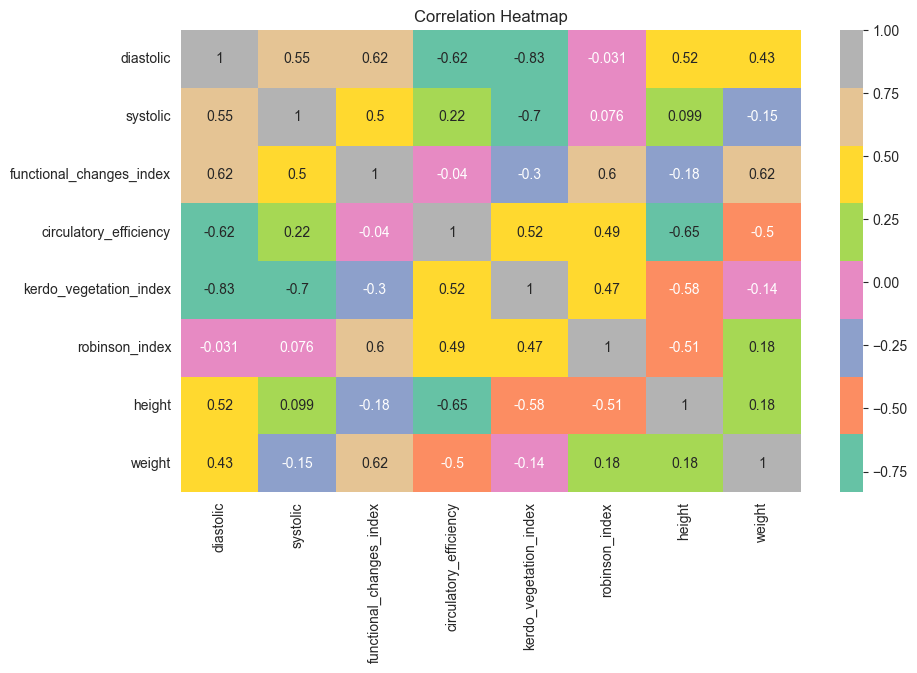

In [11]:
numeric_columns = merged_df.select_dtypes(include=[np.number]).columns
correlation_matrix = merged_df[numeric_columns].corr()
# Correlation heatmap for numerical features
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix.corr(), annot=True, cmap='Set2')
plt.title('Correlation Heatmap')
plt.show()


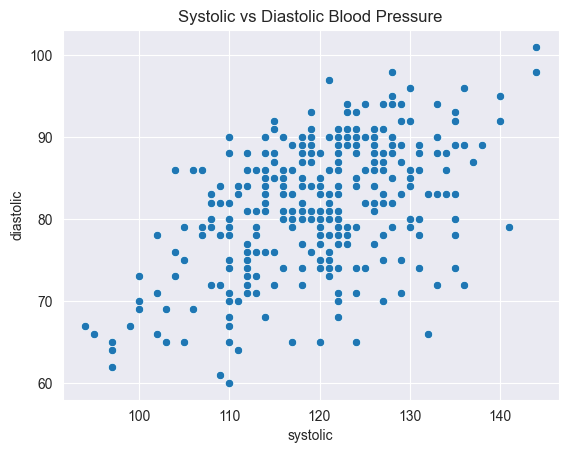

In [12]:
# Scatter plot to explore the relationship between systolic and diastolic blood pressure
sns.scatterplot(x='systolic', y='diastolic', data=merged_df)
plt.title('Systolic vs Diastolic Blood Pressure')
plt.show()


* **Interpretation**

The heatmap shows correlations between systolic, diastolic blood pressure, and participant age. 

Systolic blood pressure and FCI blood index(functional_changes_index) are strongly positively correlated. 

Diastolic blood pressure and Kerdo index(kerdo_vegetation_index) are strongly negatively correlated.

There is a negative correlation between BCE blood index(circulatory_efficiency) and height.

There is a mild positive correlation between age and blood pressure.

The scatter plot shows there is also a positive correlation between systolic and diastolic blood pressure.

## 6. Data Visualization

* **Code**

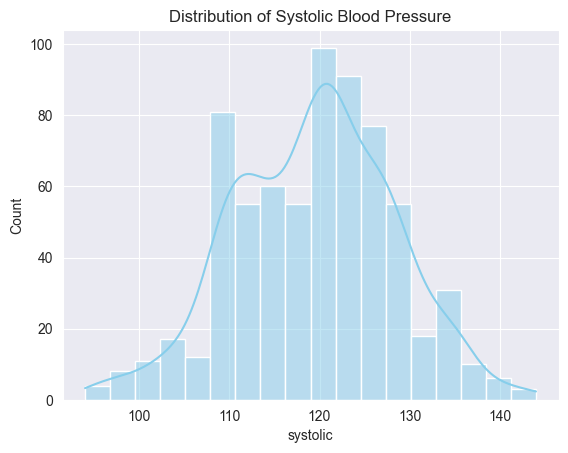

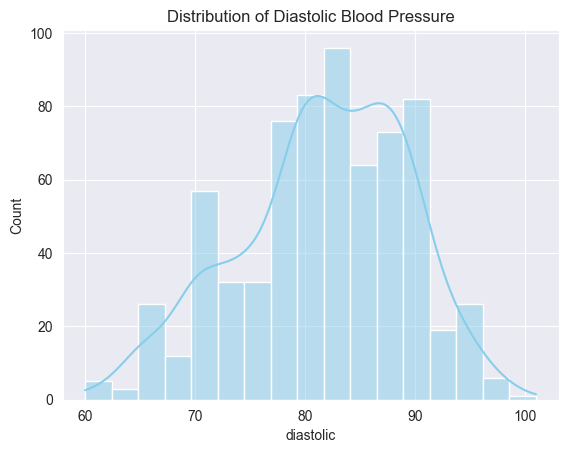

In [13]:
# Visualize the distribution of systolic blood pressure values
sns.histplot(merged_df['systolic'], kde=True, color='skyblue')
plt.title('Distribution of Systolic Blood Pressure')
plt.show()

# Visualize the distribution of diastolic blood pressure values
sns.histplot(merged_df['diastolic'], kde=True, color='skyblue')
plt.title('Distribution of Diastolic Blood Pressure')
plt.show()


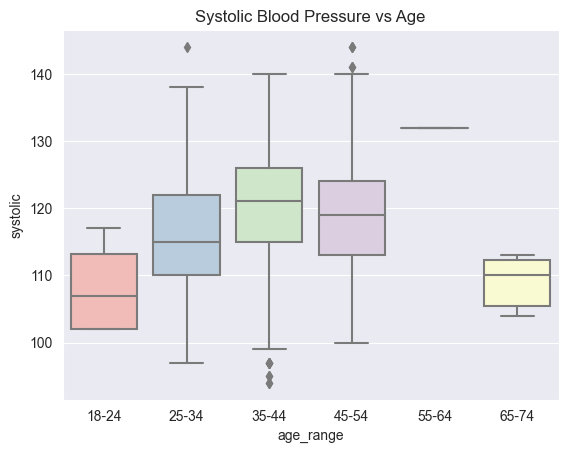

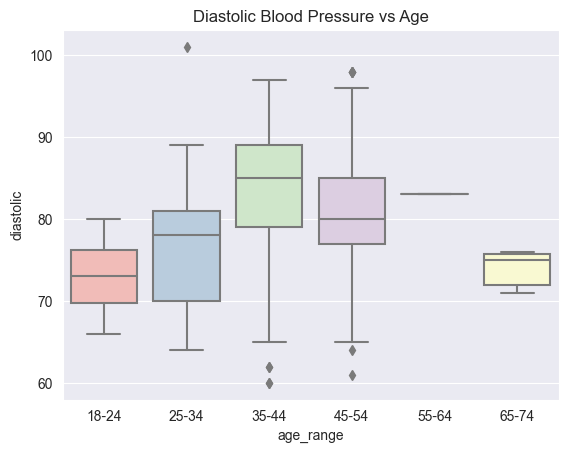

In [14]:
# Relationship between blood pressure and age
sns.boxplot(x='age_range', y='systolic', data=merged_df,
            order=['18-24','25-34','35-44','45-54','55-64','65-74'], palette='Pastel1')
plt.title('Systolic Blood Pressure vs Age')
plt.show()

# Relationship between blood pressure and age
sns.boxplot(x='age_range', y='diastolic', data=merged_df, 
            order=['18-24','25-34','35-44','45-54','55-64','65-74'], palette='Pastel1')
plt.title('Diastolic Blood Pressure vs Age')
plt.show()

* **Interpretation**

    Visualizations show the distribution of systolic, diastolic blood pressure and the age range. Moreover, the box plot illustrates a slight upward trend in blood pressure with age, indicating that older participants tend to have higher blood pressure. However, when people are over 65 years old, their blood pressure tends to decrease.

## 7. Data Transformation

* **Code**

In [15]:
merged_df = merged_df.dropna()
# Scale numerical features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(merged_df[['functional_changes_index', 'circulatory_efficiency', 'kerdo_vegetation_index']])


* **Interpretation**

    Numerical features are standardized using StandardScaler to ensure uniform scaling for the subsequent dimensionality reduction.

## 8. Feature Engineering

* **Code**

In [16]:
# Define a function to extract the two numbers and calculate the mean
def extract_and_calculate_mean(age_range):
    # Split the string by the '-' and convert to integers
    age_min, age_max = map(int, age_range.split('-'))
    # Calculate the mean of the two numbers
    age_mean = (age_min + age_max) / 2
    return age_mean

# Apply the function to calculate the mean age
merged_df['age_mean'] = merged_df['age_range'].apply(extract_and_calculate_mean)

In [17]:
# # Create a new feature: mean blood pressure
# merged_df['mean'] = (merged_df['systolic'] + merged_df['diastolic']) / 2
# print(merged_df[['systolic', 'diastolic', 'mean']].head())

* **Interpretation**

    A new feature mean_bp is created, representing the average of systolic and diastolic blood pressure. This feature allows for simplified analysis of overall blood pressure levels.

## 9. Dimensionality Reduction

* **Code**

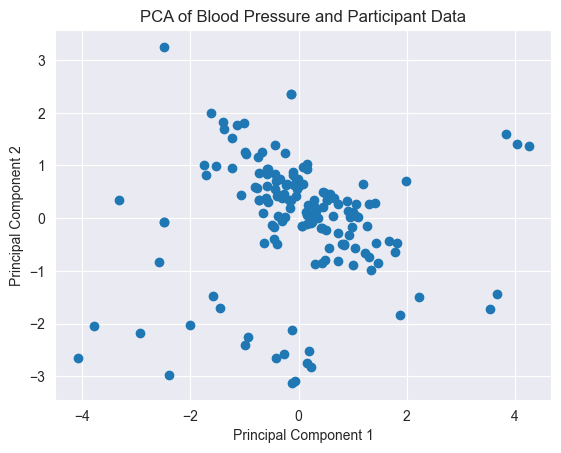

Explained variance by each component: [0.42128454 0.33283977]


In [18]:
# Select numerical features for PCA
numerical_features = merged_df[['functional_changes_index', 'circulatory_efficiency', 'kerdo_vegetation_index', 'age_mean']]

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(numerical_features)

# Apply PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)

# Visualize PCA results
plt.scatter(pca_result[:, 0], pca_result[:, 1])
plt.title('PCA of Blood Pressure and Participant Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Explained variance ratio
print(f"Explained variance by each component: {pca.explained_variance_ratio_}")


* **Interpretation**

    PCA was applied to reduce dimensionality. The first two components explain the majority of the variance, simplifying further analysis. This helps visualize patterns in blood pressure and participant demographics.

# 10. Summary and Data Quality Assessment
We explored the blood pressure dataset in conjunction with participant demographics. After cleaning and handling missing values, we performed statistical analysis and created new features. The relationship between age and blood pressure was explored, and we applied PCA to reduce dimensionality and uncover patterns in the data.

* Data Profiling: Both datasets are profiled for missing values, duplicates, and outliers.
* Data Completeness: The datasets are mostly complete with few missing values.
* Data Accuracy: Blood pressure and age values appear accurate and within reasonable ranges.
* Data Consistency: The datasets are consistent with well-defined columns and relationships between variables.
* Data Integrity: Duplicates are removed to ensure integrity. Outliers were handled using the IQR method.
* Data Lineage and Provenance: The data is collected from Welltory wearables and merged to align participant information with health measurements, ensuring the data's provenance is reliable.
